In [1]:
import pandas as pd
customer_master = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/customer_master.csv')
item_master = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/item_master.csv')
transaction_1 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_1.csv')

In [3]:
transaction_2 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_2.csv')
transaction_detail_1 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_detail_1.csv')
transaction_detail_2 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_detail_2.csv')

In [6]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [8]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [10]:
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


## 데이터 결합

In [31]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index= True) #인덱스 체크 중요!!
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index= True)
transaction_detail


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


## MERGE하기

In [33]:
merge1 = pd.merge(left = transaction_detail, right = transaction.drop('price', axis = 1), on = 'transaction_id'
                  , how = 'left')

In [35]:
merge1

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738


In [46]:
customer_master.head()
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [68]:
merge2 = pd.merge(left = merge1, right = customer_master, on = 'customer_id', how = 'left')
merge2#거래를 한 고객 기준으로 보고 싶으면 left

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시


In [86]:
merge3 = pd.merge(left = merge2, right = item_master, on = 'item_id', how = 'left')
merge3 #거래를 한 고객 기준으로 보고 싶으면 left

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000


In [73]:
merge3.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
dtype: int64

In [89]:
merge3['price'] = merge3['quantity'] * merge3['item_price']
merge3

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000,100000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000,85000


In [77]:
print(merge3['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [125]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          7144 non-null   int64         
 1   transaction_id     7144 non-null   object        
 2   item_id            7144 non-null   object        
 3   quantity           7144 non-null   int64         
 4   payment_date       7144 non-null   datetime64[ns]
 5   customer_id        7144 non-null   object        
 6   customer_name      7144 non-null   object        
 7   registration_date  7144 non-null   datetime64[ns]
 8   email              7144 non-null   object        
 9   gender             7144 non-null   object        
 10  age                7144 non-null   int64         
 11  birth              7144 non-null   datetime64[ns]
 12  pref               7144 non-null   object        
 13  item_name          7144 non-null   object        
 14  item_pri

In [135]:
merge3['birth'] = pd.to_datetime(merge3['birth'])
merge3['payment_date'] = pd.to_datetime(merge3['payment_date'])
merge3['registration_date'] = pd.to_datetime(merge3['registration_date'])

In [106]:
merge3[['gender', 'price']].groupby('gender').sum()

,price
gender,
F,481045000
M,490090000


In [107]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          7144 non-null   int64         
 1   transaction_id     7144 non-null   object        
 2   item_id            7144 non-null   object        
 3   quantity           7144 non-null   int64         
 4   payment_date       7144 non-null   datetime64[ns]
 5   customer_id        7144 non-null   object        
 6   customer_name      7144 non-null   object        
 7   registration_date  7144 non-null   datetime64[ns]
 8   email              7144 non-null   object        
 9   gender             7144 non-null   object        
 10  age                7144 non-null   int64         
 11  birth              7144 non-null   datetime64[ns]
 12  pref               7144 non-null   object        
 13  item_name          7144 non-null   object        
 14  item_pri

In [126]:
from datetime import datetime
merge3['Year'] = merge3['birth'].dt.year

merge3[['Year', 'price']].groupby('Year').sum()

,price
Year,
1938,4405000
1939,15300000
1940,10225000
1941,12270000
1942,14515000
...,...
1995,13750000
1996,16085000
1997,11935000


In [139]:
#데이터 프레임에서는 dt를 써줘라
merge3['payment_month'] = merge3['payment_date'].dt.strftime('%Y%m')


## 데이터 시각화

### figure -> 도화지
### axes -> 그래프
### axis -> 축

In [141]:
!pip install matplotlib

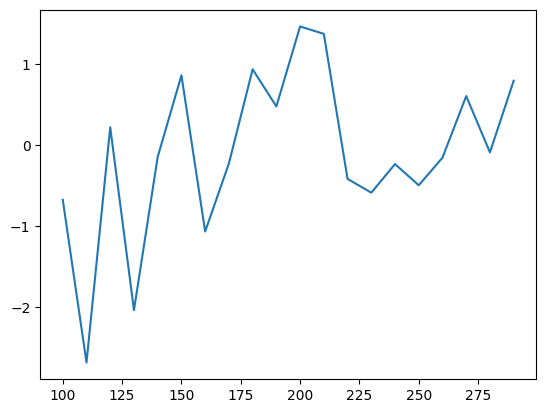

In [150]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100, 300, 10)
y = np.random.randn(20)

plt.plot(x,y)

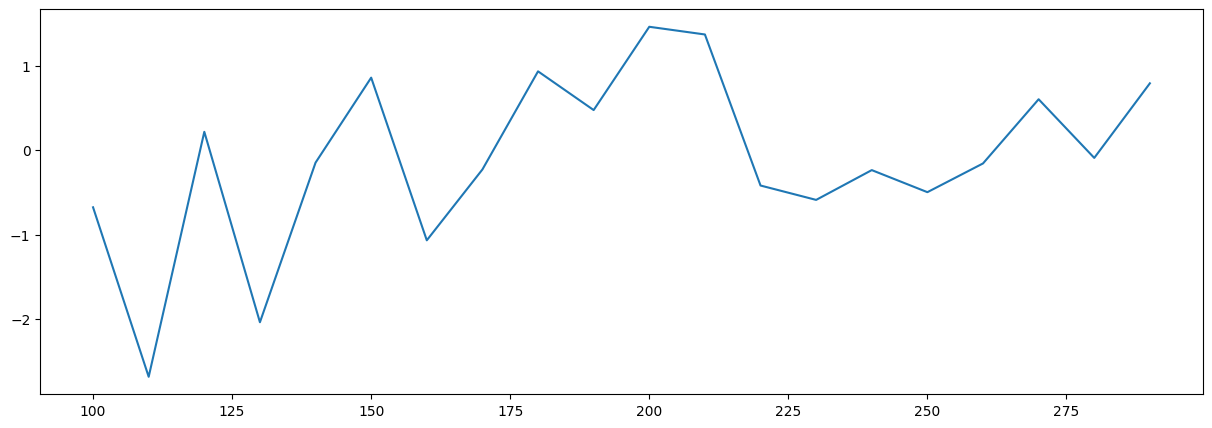

In [152]:
plt.figure(figsize = (15, 5))
plt.plot(x, y)

Text(0.5, 1.0, 'TITLE')

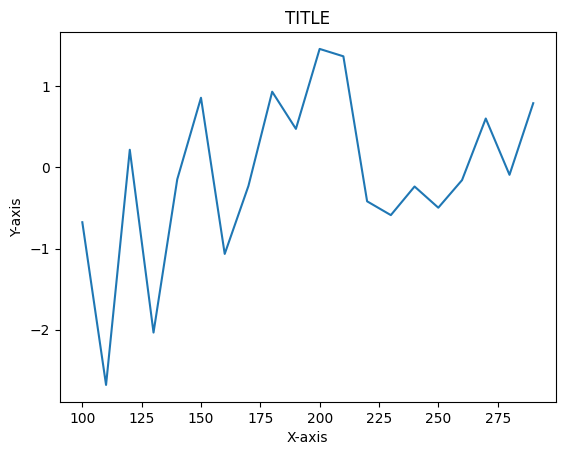

In [154]:
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('TITLE')

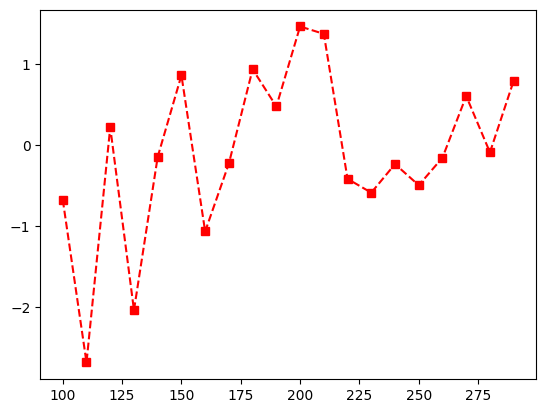

In [155]:
plt.plot(x, y, color = 'r', linestyle = '--', marker = 's')

## 여러 개의 그래프 그리기

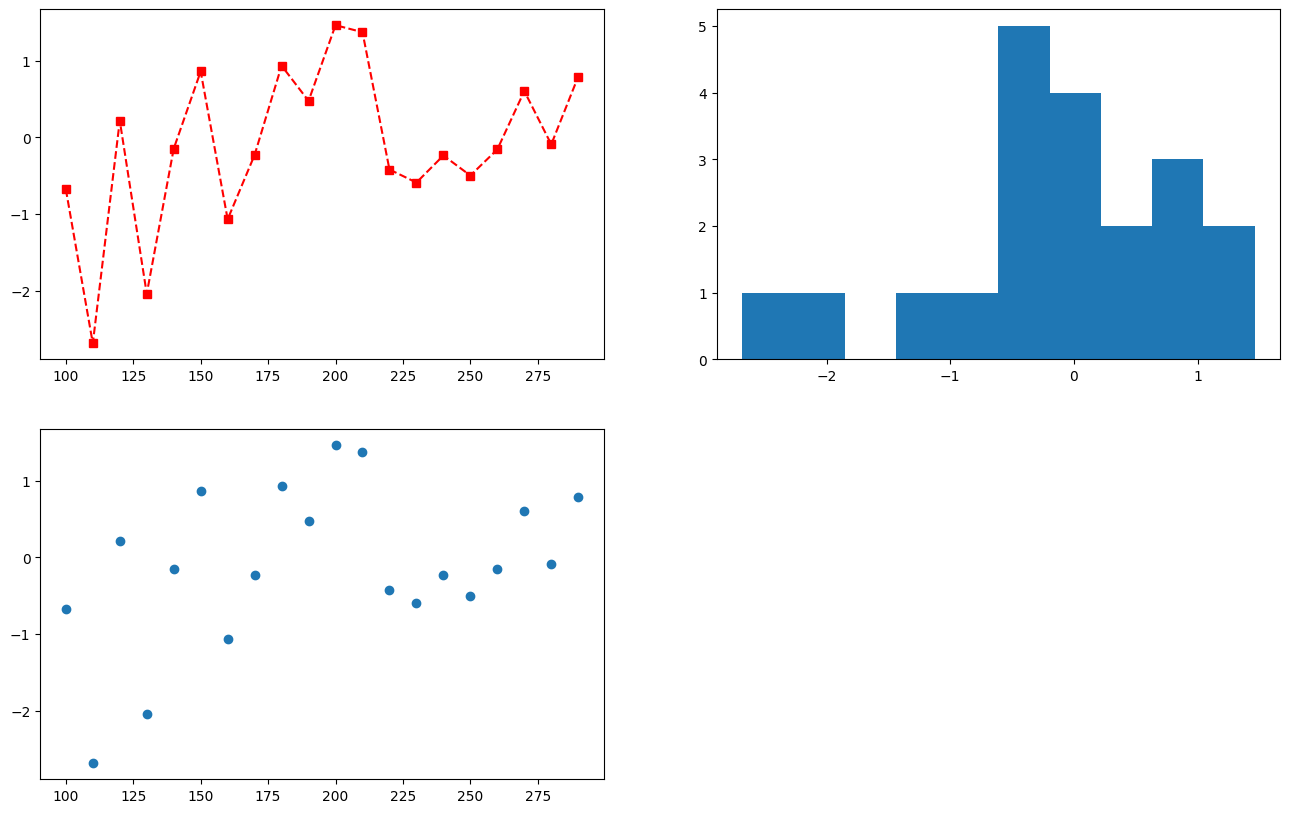

In [166]:
fig = plt.figure(figsize = (16, 10))

axes1 = fig.add_subplot(2,2,1)
axes1.plot(x, y, color = 'r', linestyle = '--', marker = 's')

axes2 = fig.add_subplot(2,2,2)
axes2.hist(y)


axes3 = fig.add_subplot(2,2,3)
axes3.scatter(x, y)

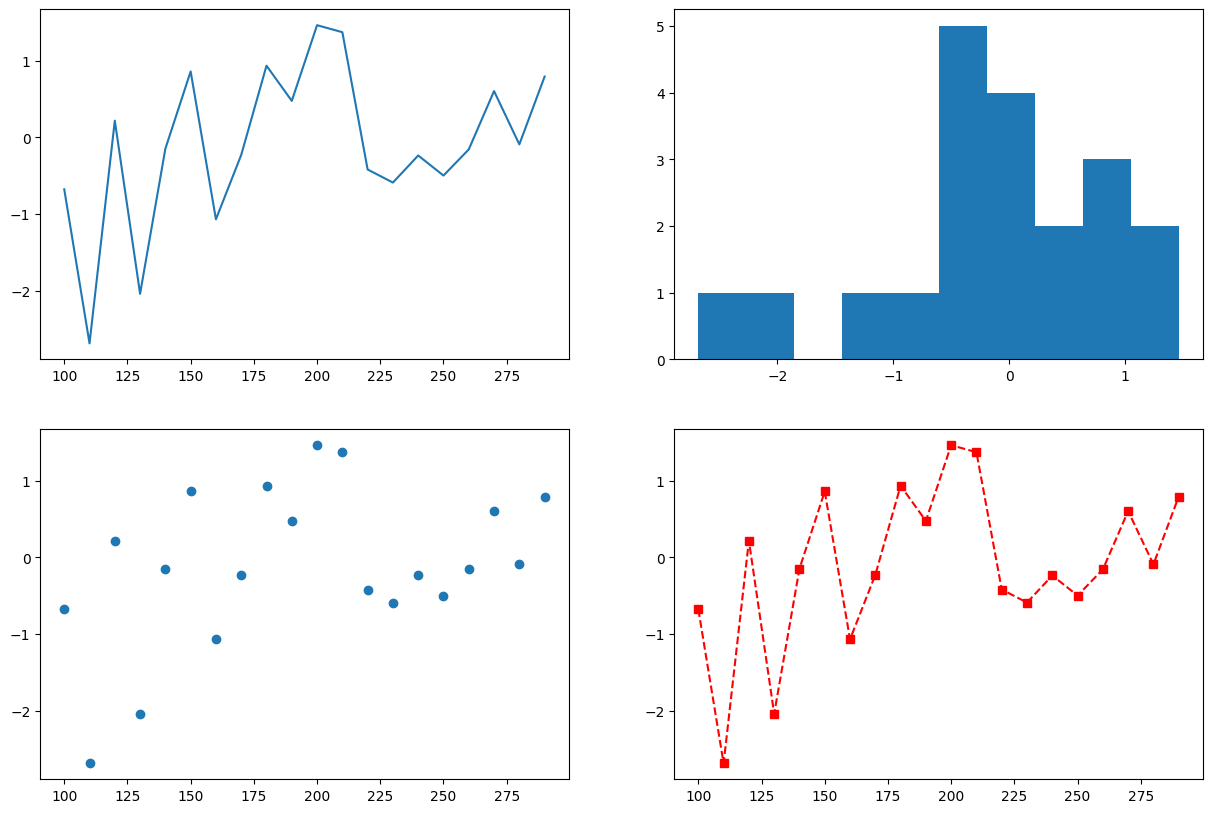

In [173]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes[0, 0].plot(x, y)
axes[0, 1].hist(y)
axes[1, 0].scatter(x, y)
axes[1, 1].plot(x, y, 'r--s')

## 하나의 figure 안에 두 개의 그래프 그리기

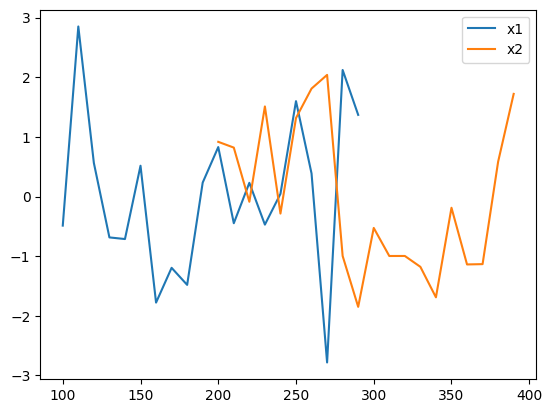

In [176]:
x1 = np.arange(100, 300, 10)
y1 = np.random.randn(20)

x2 = np.arange(200, 400, 10)
y2 = np.random.randn(20)

plt.plot(x1, y1, label = 'x1')
plt.plot(x2, y2, label = 'x2')

plt.legend(loc = 1) # <- 범례표시

## 여러 그래프의 label, title 다루기

Text(0.5, 0.98, 'Figure Title')

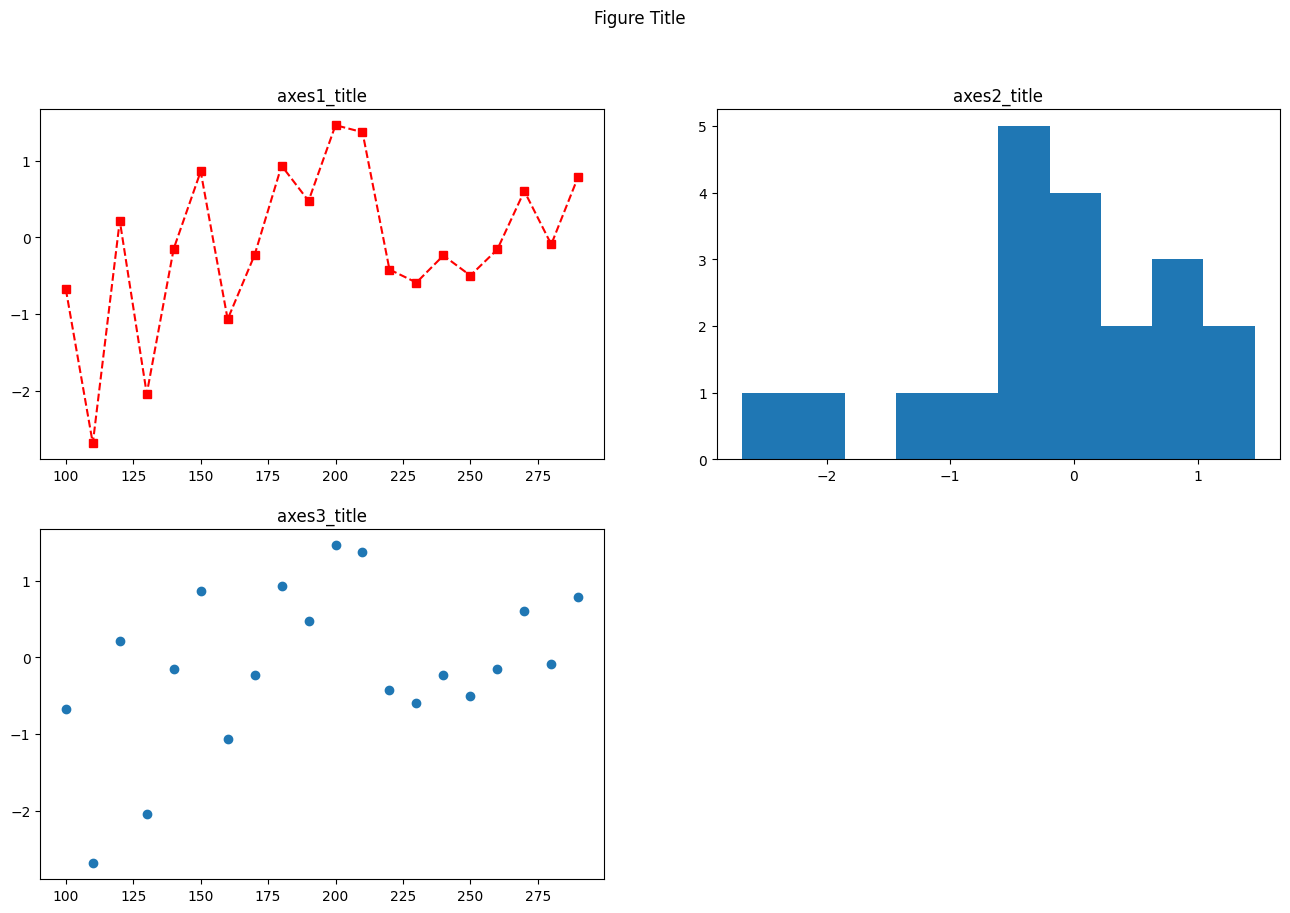

In [187]:
fig = plt.figure(figsize = (16, 10))

axes1 = fig.add_subplot(2,2,1)
axes1.plot(x, y, color = 'r', linestyle = '--', marker = 's')
axes1.set_title('axes1_title')
axes2 = fig.add_subplot(2,2,2)
axes2.hist(y)
axes2.set_title('axes2_title')

axes3 = fig.add_subplot(2,2,3)

axes3.scatter(x, y)
axes3.set_title('axes3_title')

fig.suptitle('Figure Title')



In [190]:
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<Figure size 1000x20000 with 0 Axes>

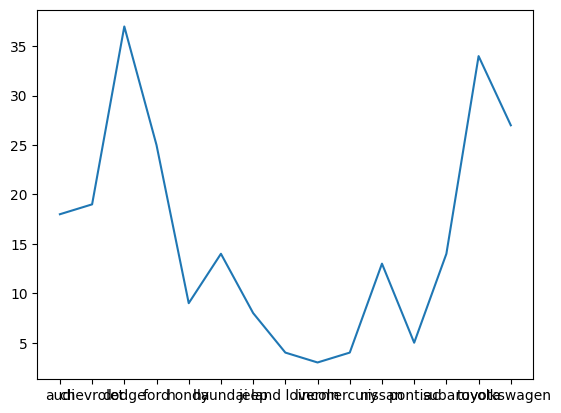

<Figure size 1000x20000 with 0 Axes>

In [222]:
a = mpg[['manufacturer', 'category']].groupby('manufacturer').count()
x1 = ['audi','chevrolet','dodge','ford','honda','hyundai','jeep','land lover','lincoln','mercury','nissan',
     'pontiac', 'subaru', 'toyota', 'volkswagen']
y_category = a['category']
plt.plot(x1, y_category)
plt.figure(figsize= (10, 200))

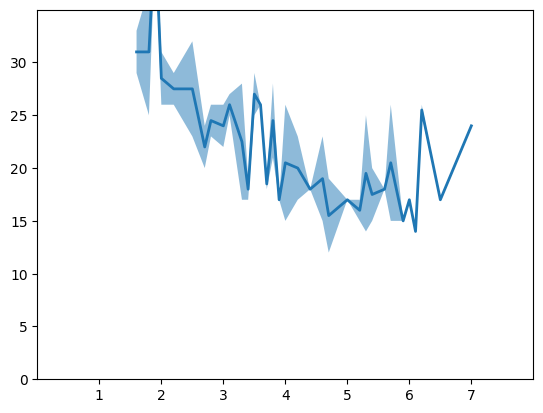

In [260]:
#1. 자동차 제조사에 따른 자동차 종류의 개수ok
#2. 자동차 배기량과 고속도로 연비 시각화
#3. 자동차 구동방식 별 도시연비 비교 시각화
b_min = mpg[['displ', 'hwy']].groupby('displ').min()
b_max = mpg[['displ', 'hwy']].groupby('displ').max()


k= mpg['displ'].drop_duplicates().tolist()
k.sort()

fig, ax = plt.subplots()

ax.fill_between(k, b_max['hwy'], b_min['hwy'], alpha=.5, linewidth=0)
ax.plot(k, (b_min['hwy'] + b_max['hwy'])/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 35), yticks=np.arange(0, 35, 5))

plt.show()

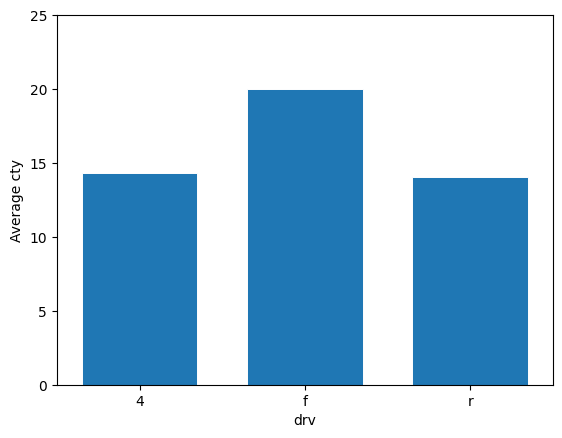

In [270]:
group_cty = mpg[['drv', 'cty']].groupby('drv').mean()

list_drv = ['4', 'r', 'v']
fig, ax = plt.subplots()

ax.bar(group_cty.index, group_cty['cty'], width=0.7, edgecolor="white", linewidth=0.7)

ax.set(xlim=(-0.5, 2.5), xticks=[0, 1, 2],
       ylim=(0, 25), yticks=np.arange(0, 26, 5),
       xlabel='drv', ylabel='Average cty')

plt.show()